<a href="https://colab.research.google.com/github/Aleamarals/Prepare-seu-dataset-para-modelagem-de-dados/blob/main/Desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidetable pandas-profiling visions
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=75b1303e997b0e29e6a20cd81b0df333244f933a2afbd14bae0ccc348cdb0e79
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
from ydata_profiling import ProfileReport
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
# Layout padrão das figuras

sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.5,
    rc={
        'figure.figsize': (14, 6)
    }
)

In [ ]:
df = pd.read_csv("/content/Data - data (2).csv.csv")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376667 entries, 0 to 376666
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    376667 non-null  object 
 1   StockCode    376667 non-null  object 
 2   Description  375393 non-null  object 
 3   Quantity     376667 non-null  int64  
 4   InvoiceDate  376667 non-null  object 
 5   UnitPrice    376667 non-null  float64
 6   CustomerID   277887 non-null  float64
 7   Country      376667 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.0+ MB


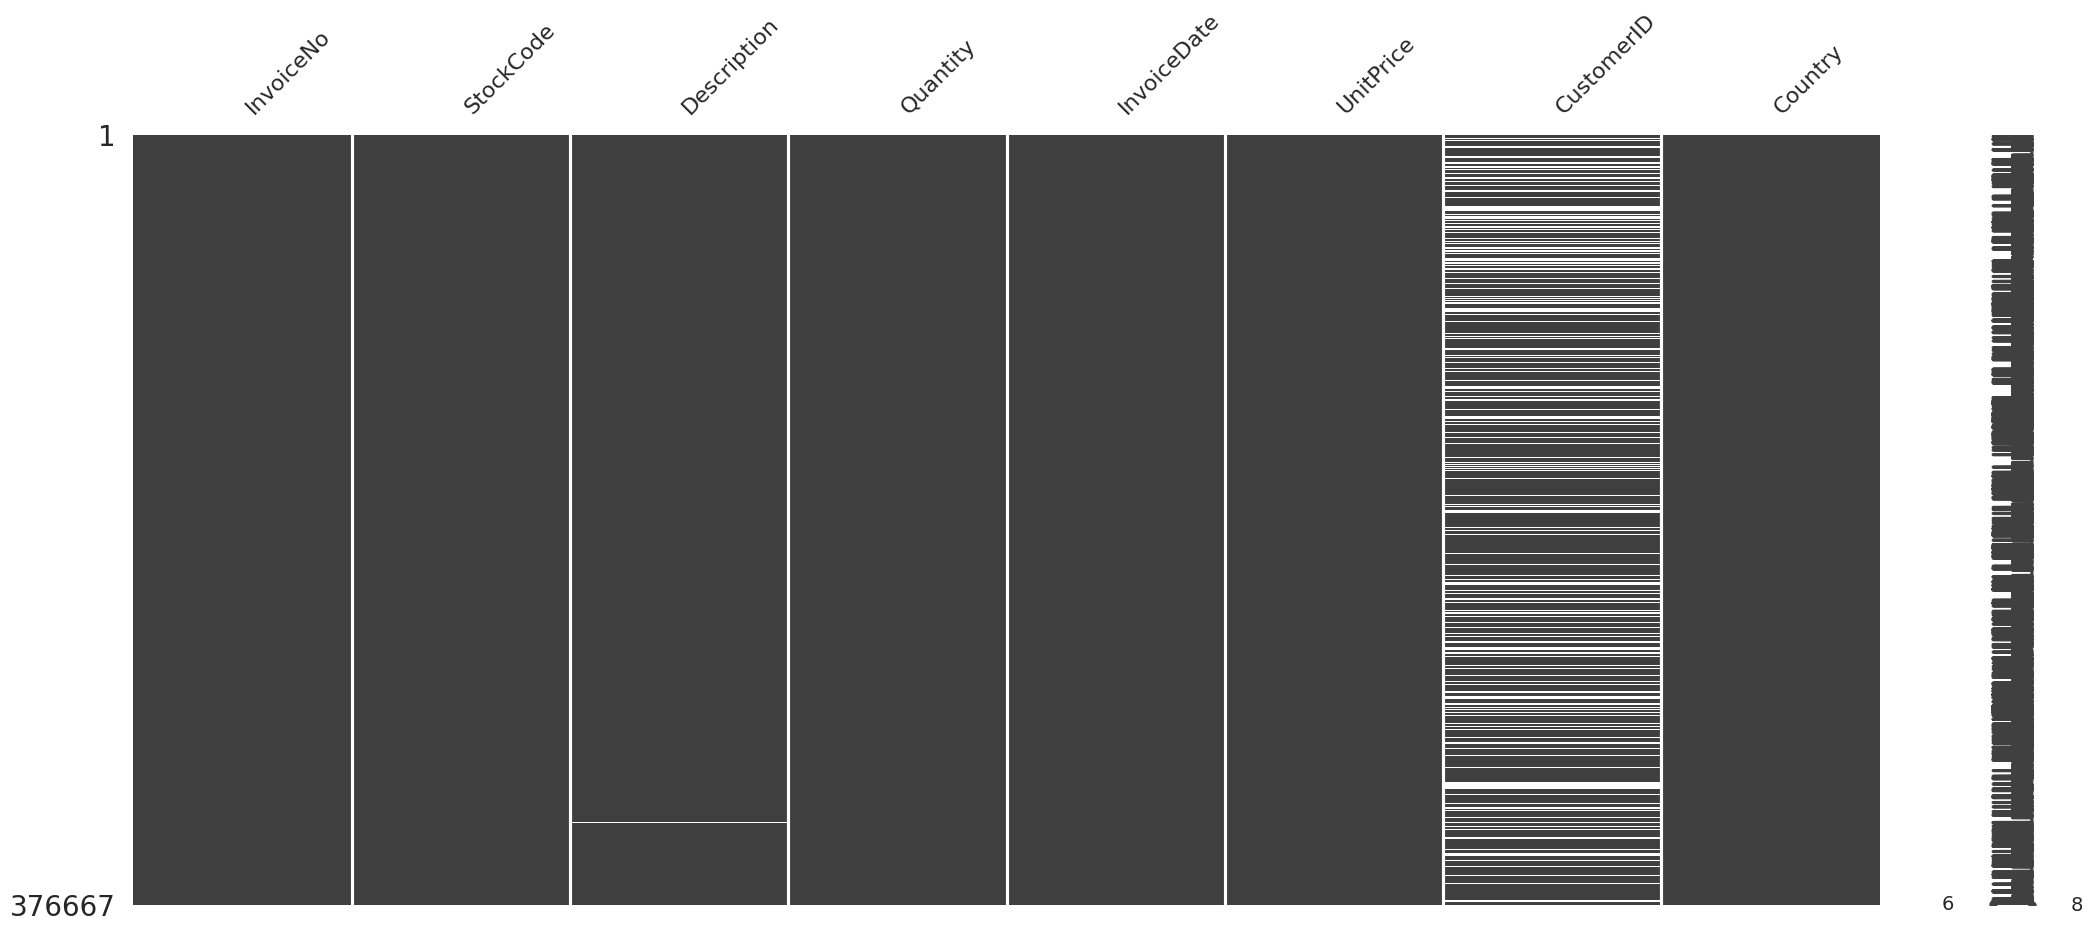

In [ ]:
# Gráfico com valores faltantes
msno.matrix(df);

In [ ]:
# Identificando linhas em branco
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
375428,569465,23269,incorrect stock entry.,-1440,10/4/2011 11:41,0.00,NaN,United Kingdom
375429,569466,23270,incorrect stock entry.,-2880,10/4/2011 11:42,0.00,NaN,United Kingdom
376126,C569495,21843,RED RETROSPOT CAKE STAND,-1,10/4/2011 13:43,10.95,NaN,Hong Kong
376200,569516,23531,WALL ART BIG LOVE,1,10/4/2011 14:03,6.95,NaN,United Kingdom


In [ ]:
# Contabilizando as linhas em branco
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1274
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,98780
Country,0


In [ ]:
# Excluindo as linhas em brancos
df.dropna(inplace=True)

In [ ]:
# Conferindo se as linhas em brancos foram excluidas
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,277887.000000,277887.000000,277887.000000
mean,12.658750,3.580363,15278.593644
std,205.080518,81.355371,1714.658498
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13881.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16780.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
# Verificando na coluna de preços unitário se há valores iguais ou inferiores a zero
df[df.UnitPrice <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom


In [ ]:
# Atualizando o dataframe somente com preços unitários acima de 0
df = df[df.UnitPrice > 0]

In [ ]:
# Verificando na coluna  quantidade se há valores iguais ou inferiores a zero
df[df.Quantity <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [ ]:
# Atualizando o dataframe somente com quantidades acima de 0
df = df[df.Quantity > 0]

In [ ]:
# Identificando valores duplicados
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
376571,569527,22759,SET OF 3 NOTEBOOKS IN PARCEL,1,10/4/2011 14:53,1.65,12512.0,Israel
376572,569527,21992,VINTAGE PAISLEY STATIONERY SET,1,10/4/2011 14:53,1.25,12512.0,Israel
376573,569527,22759,SET OF 3 NOTEBOOKS IN PARCEL,1,10/4/2011 14:53,1.65,12512.0,Israel
376648,569528,22566,FELTCRAFT HAIRBAND PINK AND PURPLE,3,10/4/2011 14:53,0.85,16242.0,United Kingdom


In [ ]:
# Identificando quantos valores duplicados tem em cada duplicada
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head()
)

n_duplicates
InvoiceNo StockCode Description                     Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER  1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER 1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
540524    21756     BATH BUILDING BLOCK WORD        1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    21754     HOME BUILDING BLOCK WORD        1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD        1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6

In [ ]:
# Removendo valores duplicados
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268590 entries, 0 to 376666
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    268590 non-null  object 
 1   StockCode    268590 non-null  object 
 2   Description  268590 non-null  object 
 3   Quantity     268590 non-null  int64  
 4   InvoiceDate  268590 non-null  object 
 5   UnitPrice    268590 non-null  float64
 6   CustomerID   268590 non-null  float64
 7   Country      268590 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 18.4+ MB


In [ ]:
# Convertendo a coluna CustomerID para int
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-22-edb2bbb18d68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
# Convertendo a coluna InvoiceDate para data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268590 entries, 0 to 376666
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    268590 non-null  object        
 1   StockCode    268590 non-null  object        
 2   Description  268590 non-null  object        
 3   Quantity     268590 non-null  int64         
 4   InvoiceDate  268590 non-null  datetime64[ns]
 5   UnitPrice    268590 non-null  float64       
 6   CustomerID   268590 non-null  int64         
 7   Country      268590 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 18.4+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


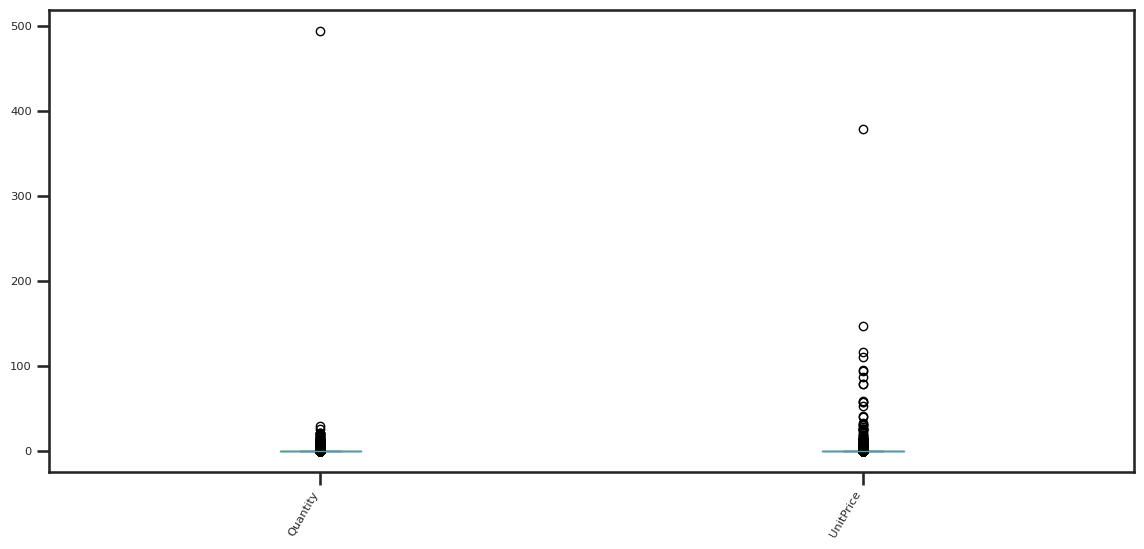

In [ ]:
# Gráfico para analisar os outliers nas colunas de quantidade e preço
numeric_df = df[['Quantity', 'UnitPrice']]
scaled_df = numeric_df.apply(scale)
scaled_df.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
# Excluindo linhas da coluna Quantity onde o valor é acima de 10000
df = df[df.Quantity <= 10000]

In [ ]:
# Excluindo linhas da coluna UnitPrice onde o valor é acima de 5000
df = df[df.UnitPrice <= 5000]

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,268588.00000,268588,268588.000000,268588.000000
mean,13.35849,2011-05-15 21:29:06.278612480,3.144010,15278.867124
min,1.00000,2010-12-01 08:26:00,0.040000,12347.000000
25%,2.00000,2011-03-01 13:51:00,1.250000,13881.000000
50%,6.00000,2011-05-19 15:15:00,1.950000,15150.000000
75%,12.00000,2011-08-04 15:33:00,3.750000,16780.000000
max,4300.00000,2011-10-04 14:58:00,3155.950000,18287.000000
std,45.01302,NaN,14.695015,1714.839242


In [ ]:
# Criando coluna chamada TotalPrice, nela constará o total da compra
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Última data de compra
ultima_data_compra = df['InvoiceDate'].max()
print(ultima_data_compra)

2011-10-04 14:58:00


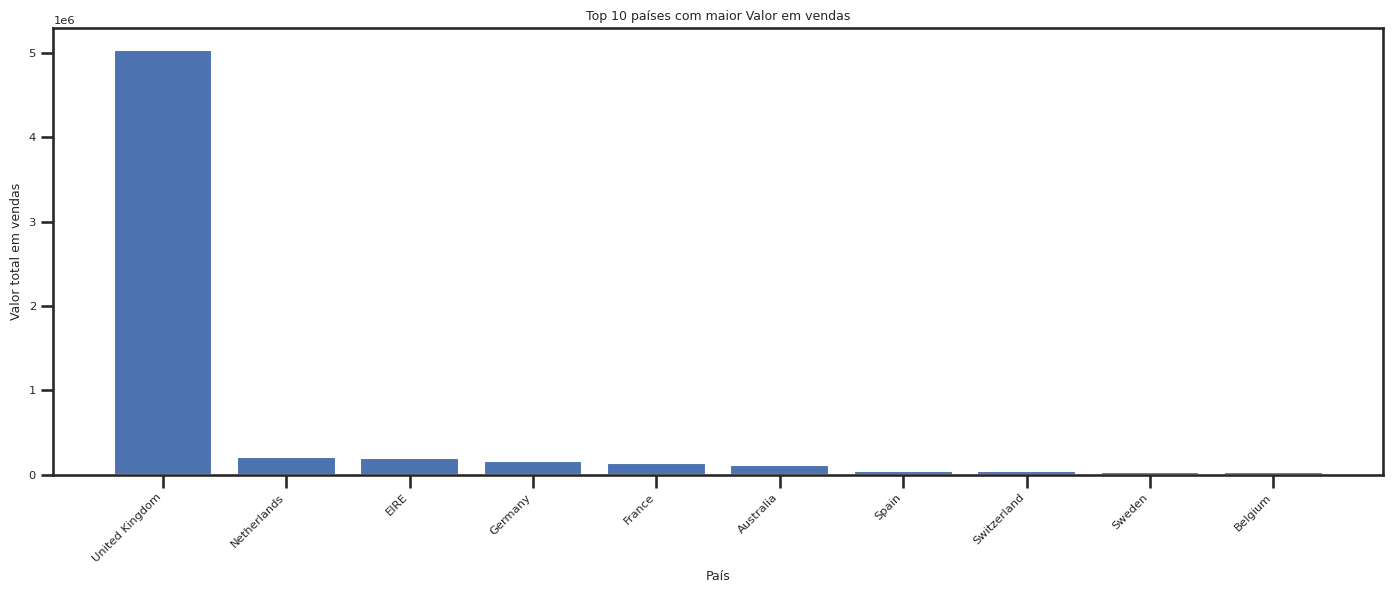

In [ ]:
# Top 10 países com os maiores valores em vendas

vendas_por_pais = df.groupby('Country')['TotalPrice'].sum()

top_10_paises = vendas_por_pais.sort_values(ascending=False).head(10)

plt.bar(top_10_paises.index, top_10_paises.values)
plt.xlabel('País')
plt.ylabel('Valor total em vendas')
plt.title('Top 10 países com maior Valor em vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

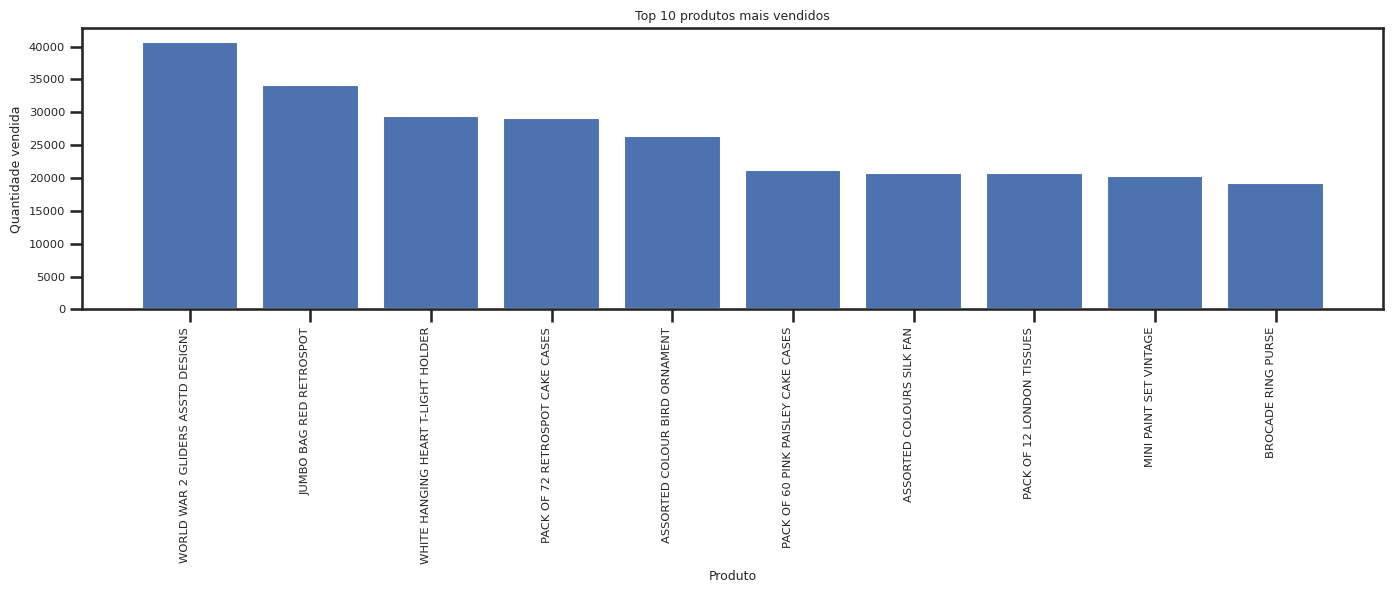

In [ ]:
# Top 10 produtos mais vendidos

top_10_produtos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.bar(top_10_produtos.index, top_10_produtos.values)
plt.xlabel('Produto')
plt.ylabel('Quantidade vendida')
plt.title('Top 10 produtos mais vendidos')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

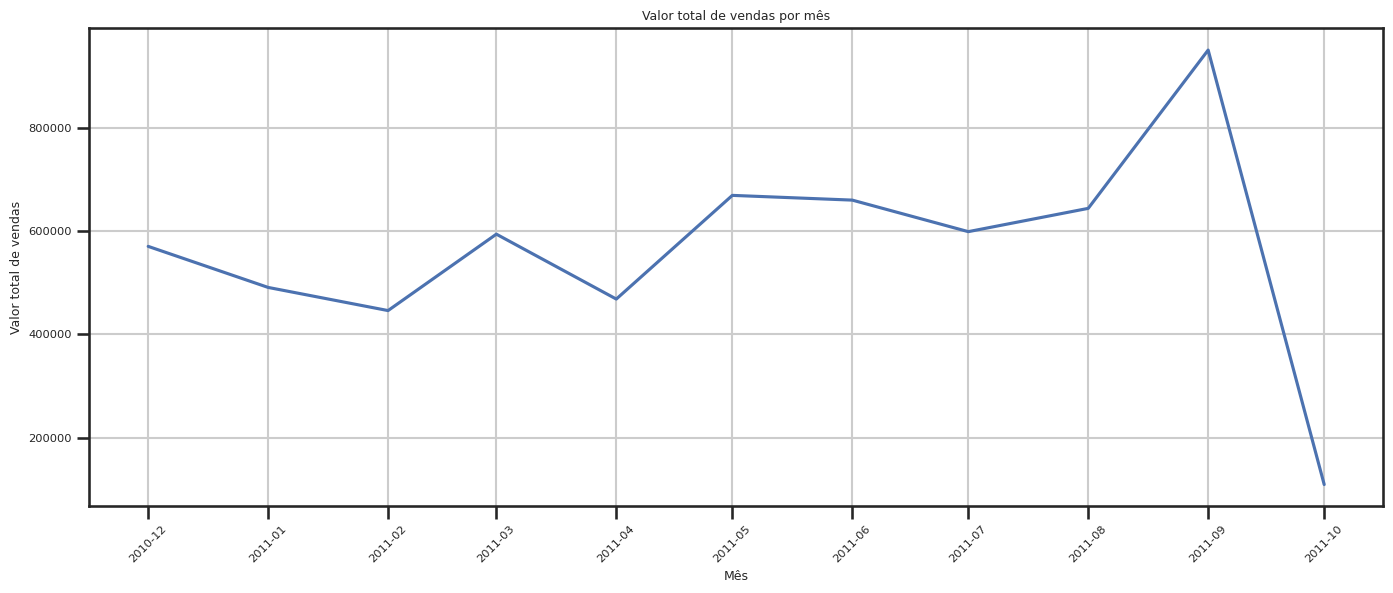

In [ ]:
# Valor de venda total por mês

vendas_por_mes = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

plt.plot(vendas_por_mes.index.to_timestamp(), vendas_por_mes.values)
plt.xlabel('Mês')
plt.ylabel('Valor total de vendas')
plt.title('Valor total de vendas por mês')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

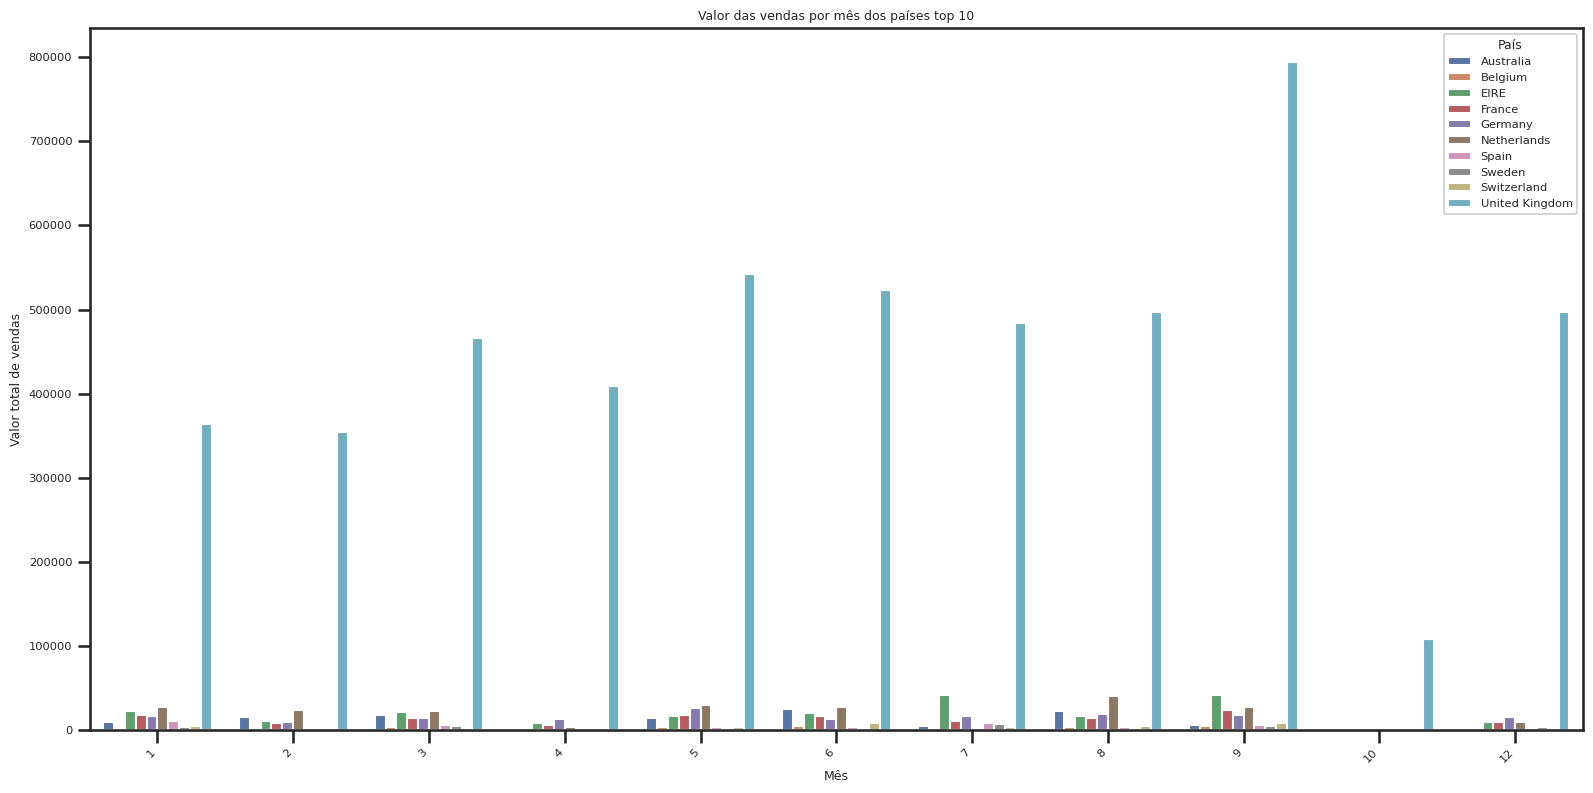

In [ ]:
# Valor das vendas por mês dos países top 10

df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

vendas_por_mes_pais = df.groupby(['Country', 'Year', 'Month'])['TotalPrice'].sum().reset_index()

top_10_paises = vendas_por_pais.sort_values(ascending=False).head(10).index.tolist()
vendas_por_mes_pais = vendas_por_mes_pais[vendas_por_mes_pais['Country'].isin(top_10_paises)]

plt.figure(figsize=(16, 8))
sns.barplot(x='Month', y='TotalPrice', hue='Country', data=vendas_por_mes_pais)
plt.xlabel('Mês')
plt.ylabel('Valor total de vendas')
plt.title('Valor das vendas por mês dos países top 10')
plt.xticks(rotation=45, ha='right')
plt.legend(title='País', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010


In [ ]:
# Agrupando os dados por cliente e pedido

df_pedido_cliente = df.groupby(['CustomerID', 'InvoiceNo'])[['InvoiceDate', 'TotalPrice']].agg({'InvoiceDate': 'first', 'TotalPrice': 'sum'}).reset_index()
df_pedido_cliente.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice
0,12347,537626,2010-12-07 14:57:00,711.79
1,12347,542237,2011-01-26 14:30:00,475.39
2,12347,549222,2011-04-07 10:43:00,636.25
3,12347,556201,2011-06-09 13:01:00,382.52
4,12347,562032,2011-08-02 08:48:00,584.91


In [ ]:
# Calculo do RFM

df_rfm = df_pedido_cliente.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ultima_data_compra - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

df_rfm = df_rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,63,5,2790.86
12348,9,4,1797.24
12350,243,1,334.40
12352,6,7,2194.31
12353,137,1,89.00
